In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv("/Users/hwang_1/Documents/scripts/python/ml/scripts/projects/eeg/EEG_Eye_State_Classification.csv")

All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset.

The duration of the measurement was 117 seconds.

The eye state was detected via a camera during the EEG measurement and added later manually to the file after analysing the video frames.

Target:

1 indicates the eye-closed and
0 the eye-open state.
All values are in chronological order with the first measured value at the top of the data.

Reference link: https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State

In [4]:
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


In [7]:
af4 = df['AF4']
af4.values.min()
af4.values.max()
af4.values.mean()

4416.435832443258

In [8]:
#eyestate = df['eyeDetection'].values * af4.values
eyestate = df['eyeDetection'].values * 4700
eyestate

array([   0,    0,    0, ..., 4700, 4700, 4700])

(4100.0, 4800.0)

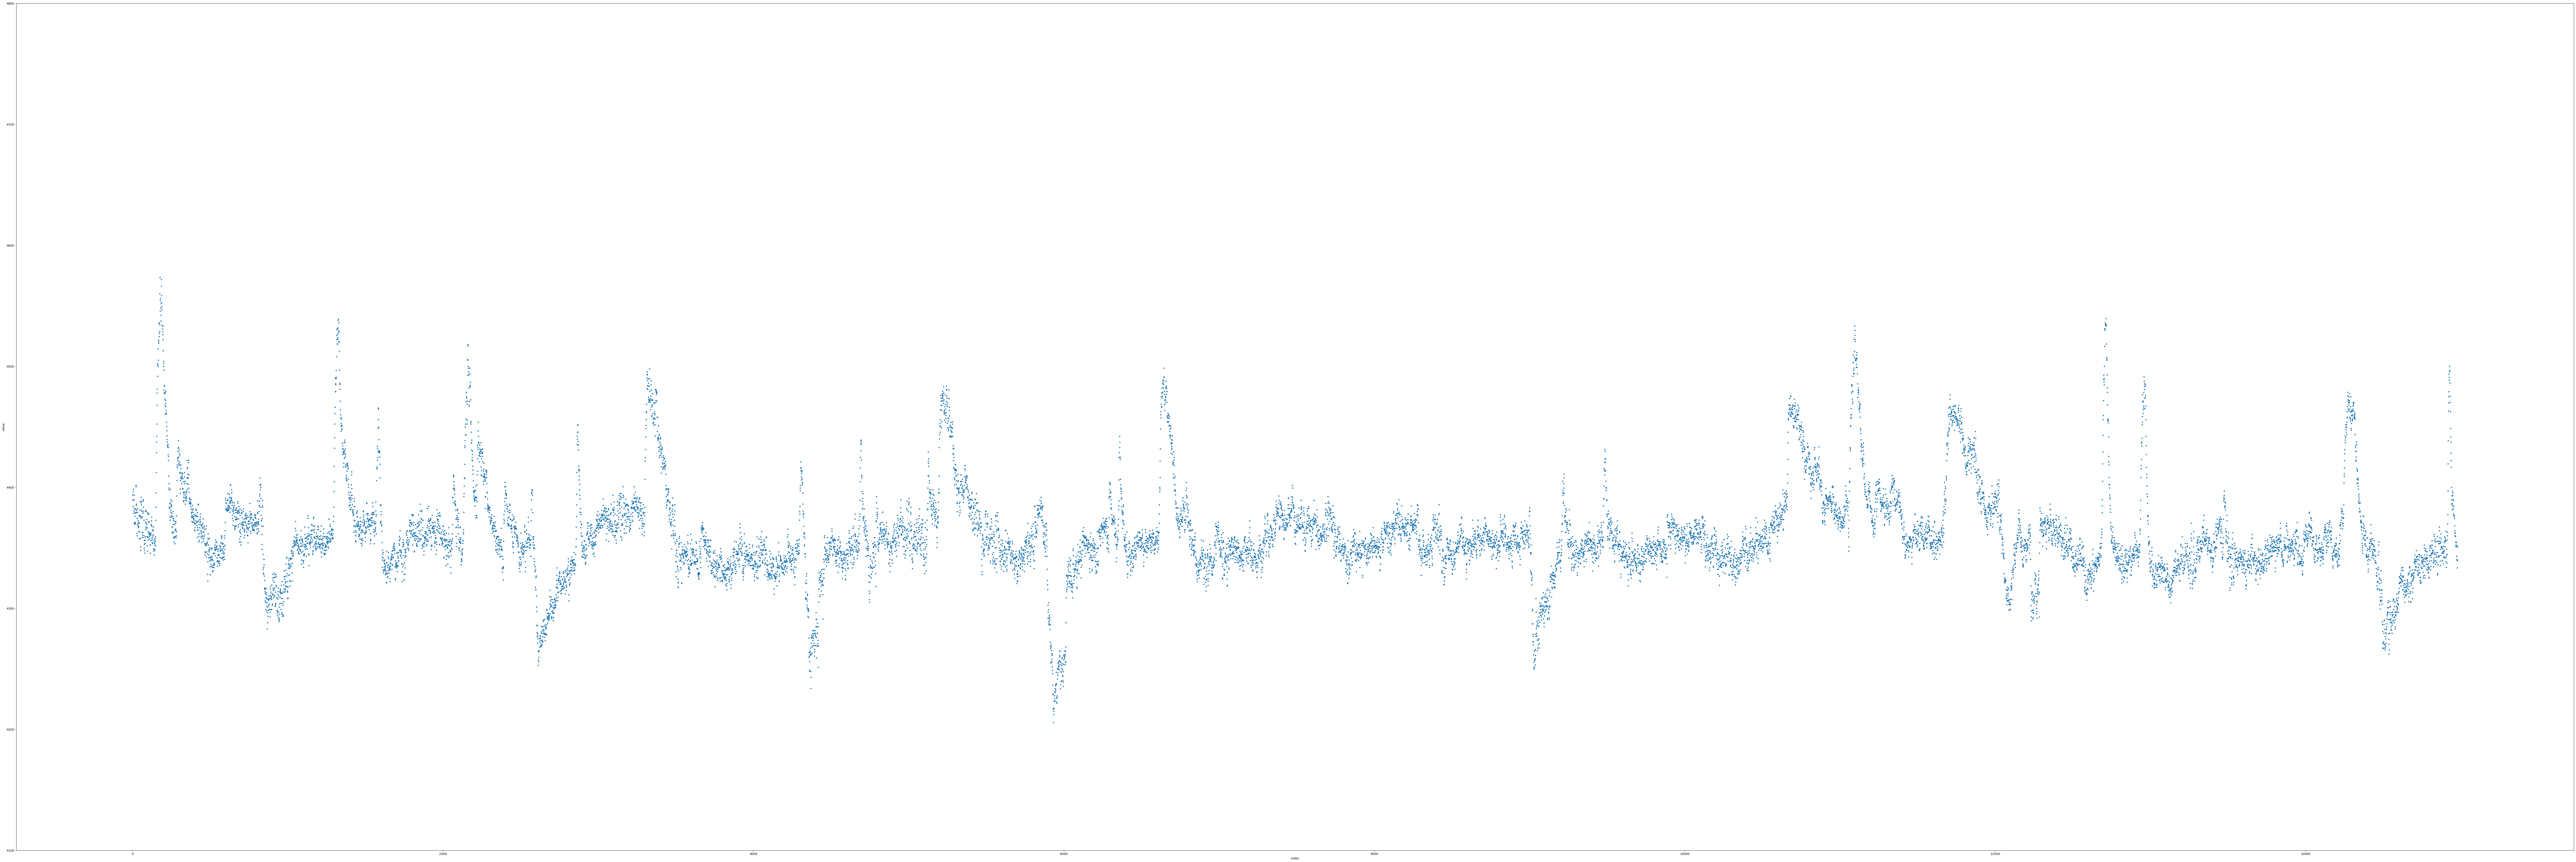

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
fig.set_figwidth(150)
fig.set_figheight(50)
ax.set_xlabel('index')
ax.set_ylabel('value')
ax.scatter(af4.index,af4.values, s=10, label = 'af4')
plt.ylim([4100,4800])

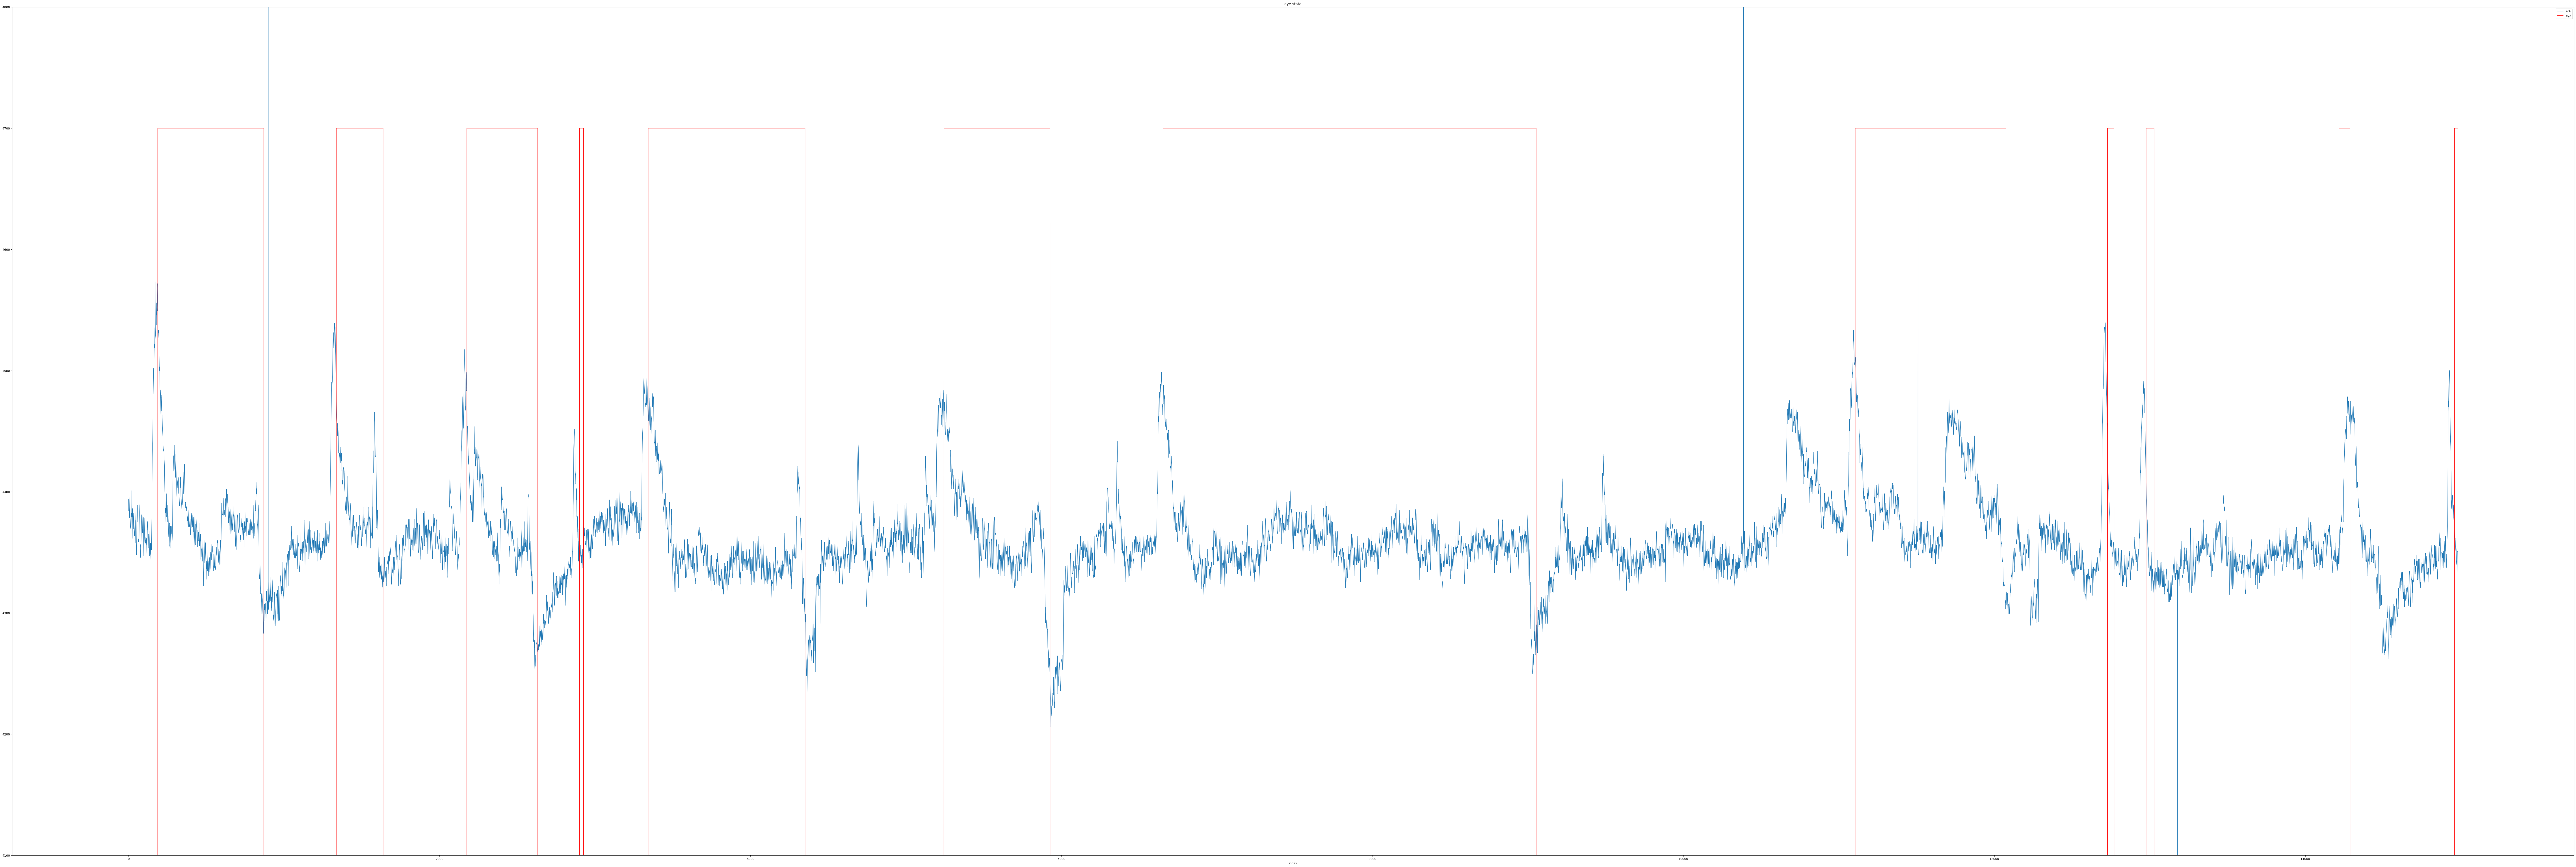

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
fig.set_figwidth(150)
fig.set_figheight(50)
plt.plot(df.index, df['AF4'], linewidth=1.0, label='af4')
plt.plot(df.index, eyestate, "r-", label='eye')
plt.title('eye state')
plt.xlabel('index')
plt.legend()
plt.ylim([ 4100, 4800])
plt.show()

In [11]:
df.isna().any()

AF3             False
F7              False
F3              False
FC5             False
T7              False
P7              False
O1              False
O2              False
P8              False
T8              False
FC6             False
F4              False
F8              False
AF4             False
eyeDetection    False
dtype: bool

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


In [13]:
df.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


In [14]:
eye_closed = df[df['eyeDetection'] == 1].count()
eye_open = df[df['eyeDetection'] == 0].count()
print(eye_closed, eye_open)

AF3             6723
F7              6723
F3              6723
FC5             6723
T7              6723
P7              6723
O1              6723
O2              6723
P8              6723
T8              6723
FC6             6723
F4              6723
F8              6723
AF4             6723
eyeDetection    6723
dtype: int64 AF3             8257
F7              8257
F3              8257
FC5             8257
T7              8257
P7              8257
O1              8257
O2              8257
P8              8257
T8              8257
FC6             8257
F4              8257
F8              8257
AF4             8257
eyeDetection    8257
dtype: int64


In [15]:
y = df['eyeDetection']

In [16]:
X = df.drop(columns=['eyeDetection'])
X

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77


In [17]:
print(X.shape, y.shape)

(14980, 14) (14980,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [19]:
X_train.shape

(11984, 14)

In [20]:
y_train.shape

(11984,)

In [21]:
X_test.shape

(2996, 14)

In [22]:
DTree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=2)
DTree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=10, random_state=2)

[Text(0.7079032874617737, 0.9545454545454546, 'x[6] <= 4099.745\nentropy = 0.993\nsamples = 11984\nvalue = [6566, 5418]'),
 Text(0.48174694189602446, 0.8636363636363636, 'x[5] <= 4618.205\nentropy = 0.983\nsamples = 10790\nvalue = [6231, 4559]'),
 Text(0.2693520642201835, 0.7727272727272727, 'x[1] <= 4021.285\nentropy = 0.999\nsamples = 6096\nvalue = [2924, 3172]'),
 Text(0.21416284403669725, 0.6818181818181818, 'x[13] <= 4365.385\nentropy = 0.985\nsamples = 4905\nvalue = [2099, 2806]'),
 Text(0.15156727828746178, 0.5909090909090909, 'x[6] <= 4062.82\nentropy = 0.999\nsamples = 3883\nvalue = [1868, 2015]'),
 Text(0.08180428134556575, 0.5, 'x[11] <= 4263.335\nentropy = 0.963\nsamples = 2362\nvalue = [913, 1449]'),
 Text(0.04128440366972477, 0.4090909090909091, 'x[12] <= 4601.795\nentropy = 0.964\nsamples = 735\nvalue = [449, 286]'),
 Text(0.024464831804281346, 0.3181818181818182, 'x[0] <= 4292.05\nentropy = 0.928\nsamples = 655\nvalue = [430, 225]'),
 Text(0.012232415902140673, 0.227272

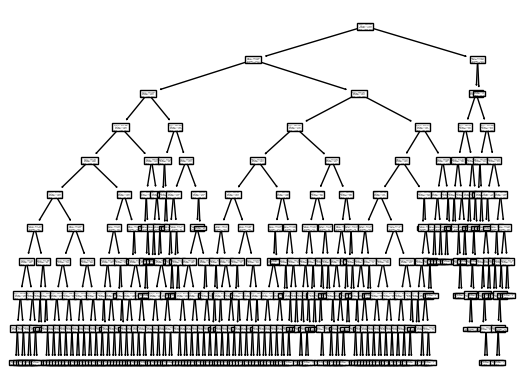

In [23]:
from sklearn import tree
#from IPython.display import SVG
#from graphviz import Source
from IPython.display import display
tree.plot_tree(DTree_clf)

In [24]:
y_predict = DTree_clf.predict(X_test)

In [25]:
accuracy_score(y_test, y_predict)

0.7873831775700935

In [26]:
DTree_clf_cv = DecisionTreeClassifier(criterion='entropy')

In [27]:
from sklearn.model_selection import RepeatedStratifiedKFold
rskcv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=2)

In [28]:
##Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [5, 10, 20, 30],
    "min_samples_split": [10, 20, 30],
    "min_samples_leaf": [5, 10, 20],
    "criterion": ['entropy','gini']
}
DTree_clf = DecisionTreeClassifier()
grid_cv = GridSearchCV(DTree_clf_cv, param_grid, n_jobs=-1, cv=rskcv, scoring="accuracy")
#result = grid_cv.fit(X_train, y_train)
result = grid_cv.fit(X, y)

In [29]:
result.best_score_

0.8273698182127251

In [30]:
grid_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

In [31]:
##with cross validation
DTree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=10, min_samples_leaf=5, random_state=2)
#scores = cross_val_score(DTree_clf, X_train, y_train, cv=5, scoring='accuracy')
DTree_clf.fit(X_train, y_train)
#print(scores)
y_predict = DTree_clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.8304405874499332

###Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
#RForest_clf = RandomForestClassifier(random_state=2, n_estimators=250,bootstrap=True, max_depth=20, min_samples_leaf=10, min_samples_split=10)
RForest_clf = RandomForestClassifier(random_state=2)
RForest_clf.fit(X_train, y_train)
y_predict = RForest_clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.9302403204272364

In [33]:
##Grid Search
param_grid = {
    "n_estimators": [100,250,500,750,1000],
    "max_depth": [10,20,30],
    "min_samples_split": [10, 20, 30],
    "min_samples_leaf": [5, 10, 20],
    "bootstrap": [True],
}
RForest_clf = RandomForestClassifier(random_state=2)
grid_cv = GridSearchCV(RForest_clf, param_grid, n_jobs=-1, cv=rskcv, scoring="accuracy")
result = grid_cv.fit(X, y)

In [34]:
result.best_score_

0.9083776625147321

In [35]:
result.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 750}

In [36]:
RForest_clf_2 = RandomForestClassifier(bootstrap=True, random_state=2, max_depth=30, min_samples_leaf=5, min_samples_split=10, n_estimators=750, max_features='log2')
RForest_clf_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_leaf=5,
                       min_samples_split=10, n_estimators=750, random_state=2)

In [37]:
y_predict = RForest_clf_2.predict(X_test)
accuracy_score(y_test, y_predict)

0.9145527369826435

In [41]:
#from sklearn.metrics import roc_auc_score
#roc_auc_score(y_test, y_predict)

In [42]:
#scores = cross_val_score(RForest_clf_2, X_train, y_train, cv=5, scoring='accuracy')
#print(scores)

In [39]:
##random search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dict = dict()
param_dict = {
    "n_estimators": sp_randint(600,800),
    "max_depth": sp_randint(20,40),
    "min_samples_split": sp_randint(10, 20),
    "min_samples_leaf": sp_randint(5, 10)
}
RandomSearch = RandomizedSearchCV(estimator=RForest_clf, param_distributions = param_dict,
                               cv =rskcv, n_iter = 30, n_jobs=-1)
result = RandomSearch.fit(X_train, y_train)

In [40]:
print(RandomSearch.best_estimator_)
print(RandomSearch.best_score_)
print(RandomSearch.best_params_)

RandomForestClassifier(max_depth=24, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=693, random_state=2)
0.8997413725928901
{'max_depth': 24, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 693}


In [42]:
##optuna
import optuna
def run(trial):
    fold = 1
    max_depth = trial.suggest_int('max_depth', 1, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 10,60,5)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 10,40,5)
    n_estimators = trial.suggest_int("n_estimators", 100,1000,100)
    bootstrap = trial.suggest_categorical('bootstrap', [True])
    max_features = trial.suggest_categorical('max_features', ["sqrt", "log2"])

    X_valid = X_test
    y_valid = y_test
    
    print(y_train)
    print("train", X_train.head())

    clf = RandomForestClassifier(
        random_state=42,
        min_samples_split=min_samples_split,
        min_samples_leaf = min_samples_leaf,
        max_depth=max_depth,
        n_estimators = n_estimators,
        bootstrap = bootstrap,
        max_features = max_features)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
    
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(run, n_trials=20)

/Users/hwang_1/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-04-27 21:32:35,414] A new study created in memory with name: no-name-8dac773a-e057-4030-8d0d-ef96de490078


1344     1
12401    0
8748     1
10154    0
2976     0
        ..
3473     1
8535     1
14528    0
899      0
12706    0
Name: eyeDetection, Length: 11984, dtype: int64
train            AF3       F7       F3      FC5       T7       P7       O1       O2  \
1344   4355.90  3985.13  4275.38  4103.08  4326.67  4591.79  4084.10  4619.49   
12401  4298.46  3995.38  4263.59  4125.13  4346.15  4626.67  4086.67  4631.28   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
10154  4281.03  3987.18  4250.26  4096.92  4328.72  4604.10  4046.15  4609.23   
2976   4276.92  3972.31  4247.69  4105.13  4319.49  4616.41  4083.08  4609.74   

            P8       T8      FC6       F4       F8      AF4  
1344   4222.56  4249.74  4257.95  4310.77  4700.00  4450.26  
12401  4196.92  4225.64  4203.08  4276.92  4605.64  4350.77  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44  
10154  4198.46  4240.51  4190.26  4269.74  4603.08  4352.31  
2976   4201.54  4226.67  419

[I 2023-04-27 21:32:48,686] Trial 0 finished with value: 0.779974343175373 and parameters: {'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 15, 'n_estimators': 900, 'bootstrap': True, 'max_features': 'log2'}. Best is trial 0 with value: 0.779974343175373.


1344     1
12401    0
8748     1
10154    0
2976     0
        ..
3473     1
8535     1
14528    0
899      0
12706    0
Name: eyeDetection, Length: 11984, dtype: int64
train            AF3       F7       F3      FC5       T7       P7       O1       O2  \
1344   4355.90  3985.13  4275.38  4103.08  4326.67  4591.79  4084.10  4619.49   
12401  4298.46  3995.38  4263.59  4125.13  4346.15  4626.67  4086.67  4631.28   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
10154  4281.03  3987.18  4250.26  4096.92  4328.72  4604.10  4046.15  4609.23   
2976   4276.92  3972.31  4247.69  4105.13  4319.49  4616.41  4083.08  4609.74   

            P8       T8      FC6       F4       F8      AF4  
1344   4222.56  4249.74  4257.95  4310.77  4700.00  4450.26  
12401  4196.92  4225.64  4203.08  4276.92  4605.64  4350.77  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44  
10154  4198.46  4240.51  4190.26  4269.74  4603.08  4352.31  
2976   4201.54  4226.67  419

[I 2023-04-27 21:32:52,410] Trial 1 finished with value: 0.9229726884701968 and parameters: {'max_depth': 20, 'min_samples_split': 25, 'min_samples_leaf': 35, 'n_estimators': 100, 'bootstrap': True, 'max_features': 'log2'}. Best is trial 1 with value: 0.9229726884701968.


1344     1
12401    0
8748     1
10154    0
2976     0
        ..
3473     1
8535     1
14528    0
899      0
12706    0
Name: eyeDetection, Length: 11984, dtype: int64
train            AF3       F7       F3      FC5       T7       P7       O1       O2  \
1344   4355.90  3985.13  4275.38  4103.08  4326.67  4591.79  4084.10  4619.49   
12401  4298.46  3995.38  4263.59  4125.13  4346.15  4626.67  4086.67  4631.28   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
10154  4281.03  3987.18  4250.26  4096.92  4328.72  4604.10  4046.15  4609.23   
2976   4276.92  3972.31  4247.69  4105.13  4319.49  4616.41  4083.08  4609.74   

            P8       T8      FC6       F4       F8      AF4  
1344   4222.56  4249.74  4257.95  4310.77  4700.00  4450.26  
12401  4196.92  4225.64  4203.08  4276.92  4605.64  4350.77  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44  
10154  4198.46  4240.51  4190.26  4269.74  4603.08  4352.31  
2976   4201.54  4226.67  419

[I 2023-04-27 21:33:03,417] Trial 2 finished with value: 0.9179727120612637 and parameters: {'max_depth': 21, 'min_samples_split': 10, 'min_samples_leaf': 40, 'n_estimators': 300, 'bootstrap': True, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9229726884701968.


1344     1
12401    0
8748     1
10154    0
2976     0
        ..
3473     1
8535     1
14528    0
899      0
12706    0
Name: eyeDetection, Length: 11984, dtype: int64
train            AF3       F7       F3      FC5       T7       P7       O1       O2  \
1344   4355.90  3985.13  4275.38  4103.08  4326.67  4591.79  4084.10  4619.49   
12401  4298.46  3995.38  4263.59  4125.13  4346.15  4626.67  4086.67  4631.28   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
10154  4281.03  3987.18  4250.26  4096.92  4328.72  4604.10  4046.15  4609.23   
2976   4276.92  3972.31  4247.69  4105.13  4319.49  4616.41  4083.08  4609.74   

            P8       T8      FC6       F4       F8      AF4  
1344   4222.56  4249.74  4257.95  4310.77  4700.00  4450.26  
12401  4196.92  4225.64  4203.08  4276.92  4605.64  4350.77  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44  
10154  4198.46  4240.51  4190.26  4269.74  4603.08  4352.31  
2976   4201.54  4226.67  419

[I 2023-04-27 21:33:37,027] Trial 3 finished with value: 0.9241315543089618 and parameters: {'max_depth': 22, 'min_samples_split': 10, 'min_samples_leaf': 35, 'n_estimators': 900, 'bootstrap': True, 'max_features': 'log2'}. Best is trial 3 with value: 0.9241315543089618.


1344     1
12401    0
8748     1
10154    0
2976     0
        ..
3473     1
8535     1
14528    0
899      0
12706    0
Name: eyeDetection, Length: 11984, dtype: int64
train            AF3       F7       F3      FC5       T7       P7       O1       O2  \
1344   4355.90  3985.13  4275.38  4103.08  4326.67  4591.79  4084.10  4619.49   
12401  4298.46  3995.38  4263.59  4125.13  4346.15  4626.67  4086.67  4631.28   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
10154  4281.03  3987.18  4250.26  4096.92  4328.72  4604.10  4046.15  4609.23   
2976   4276.92  3972.31  4247.69  4105.13  4319.49  4616.41  4083.08  4609.74   

            P8       T8      FC6       F4       F8      AF4  
1344   4222.56  4249.74  4257.95  4310.77  4700.00  4450.26  
12401  4196.92  4225.64  4203.08  4276.92  4605.64  4350.77  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44  
10154  4198.46  4240.51  4190.26  4269.74  4603.08  4352.31  
2976   4201.54  4226.67  419

[I 2023-04-27 21:34:12,968] Trial 4 finished with value: 0.9364504689870866 and parameters: {'max_depth': 17, 'min_samples_split': 30, 'min_samples_leaf': 25, 'n_estimators': 900, 'bootstrap': True, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.9364504689870866.


1344     1
12401    0
8748     1
10154    0
2976     0
        ..
3473     1
8535     1
14528    0
899      0
12706    0
Name: eyeDetection, Length: 11984, dtype: int64
train            AF3       F7       F3      FC5       T7       P7       O1       O2  \
1344   4355.90  3985.13  4275.38  4103.08  4326.67  4591.79  4084.10  4619.49   
12401  4298.46  3995.38  4263.59  4125.13  4346.15  4626.67  4086.67  4631.28   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
10154  4281.03  3987.18  4250.26  4096.92  4328.72  4604.10  4046.15  4609.23   
2976   4276.92  3972.31  4247.69  4105.13  4319.49  4616.41  4083.08  4609.74   

            P8       T8      FC6       F4       F8      AF4  
1344   4222.56  4249.74  4257.95  4310.77  4700.00  4450.26  
12401  4196.92  4225.64  4203.08  4276.92  4605.64  4350.77  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44  
10154  4198.46  4240.51  4190.26  4269.74  4603.08  4352.31  
2976   4201.54  4226.67  419

[I 2023-04-27 21:34:16,532] Trial 5 finished with value: 0.7488754183320887 and parameters: {'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 30, 'n_estimators': 300, 'bootstrap': True, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.9364504689870866.


1344     1
12401    0
8748     1
10154    0
2976     0
        ..
3473     1
8535     1
14528    0
899      0
12706    0
Name: eyeDetection, Length: 11984, dtype: int64
train            AF3       F7       F3      FC5       T7       P7       O1       O2  \
1344   4355.90  3985.13  4275.38  4103.08  4326.67  4591.79  4084.10  4619.49   
12401  4298.46  3995.38  4263.59  4125.13  4346.15  4626.67  4086.67  4631.28   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
10154  4281.03  3987.18  4250.26  4096.92  4328.72  4604.10  4046.15  4609.23   
2976   4276.92  3972.31  4247.69  4105.13  4319.49  4616.41  4083.08  4609.74   

            P8       T8      FC6       F4       F8      AF4  
1344   4222.56  4249.74  4257.95  4310.77  4700.00  4450.26  
12401  4196.92  4225.64  4203.08  4276.92  4605.64  4350.77  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44  
10154  4198.46  4240.51  4190.26  4269.74  4603.08  4352.31  
2976   4201.54  4226.67  419

[I 2023-04-27 21:34:48,496] Trial 6 finished with value: 0.936748456105834 and parameters: {'max_depth': 20, 'min_samples_split': 35, 'min_samples_leaf': 25, 'n_estimators': 800, 'bootstrap': True, 'max_features': 'sqrt'}. Best is trial 6 with value: 0.936748456105834.


1344     1
12401    0
8748     1
10154    0
2976     0
        ..
3473     1
8535     1
14528    0
899      0
12706    0
Name: eyeDetection, Length: 11984, dtype: int64
train            AF3       F7       F3      FC5       T7       P7       O1       O2  \
1344   4355.90  3985.13  4275.38  4103.08  4326.67  4591.79  4084.10  4619.49   
12401  4298.46  3995.38  4263.59  4125.13  4346.15  4626.67  4086.67  4631.28   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
10154  4281.03  3987.18  4250.26  4096.92  4328.72  4604.10  4046.15  4609.23   
2976   4276.92  3972.31  4247.69  4105.13  4319.49  4616.41  4083.08  4609.74   

            P8       T8      FC6       F4       F8      AF4  
1344   4222.56  4249.74  4257.95  4310.77  4700.00  4450.26  
12401  4196.92  4225.64  4203.08  4276.92  4605.64  4350.77  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44  
10154  4198.46  4240.51  4190.26  4269.74  4603.08  4352.31  
2976   4201.54  4226.67  419

[I 2023-04-27 21:35:01,627] Trial 7 finished with value: 0.8346694849183708 and parameters: {'max_depth': 5, 'min_samples_split': 45, 'min_samples_leaf': 15, 'n_estimators': 600, 'bootstrap': True, 'max_features': 'log2'}. Best is trial 6 with value: 0.936748456105834.


1344     1
12401    0
8748     1
10154    0
2976     0
        ..
3473     1
8535     1
14528    0
899      0
12706    0
Name: eyeDetection, Length: 11984, dtype: int64
train            AF3       F7       F3      FC5       T7       P7       O1       O2  \
1344   4355.90  3985.13  4275.38  4103.08  4326.67  4591.79  4084.10  4619.49   
12401  4298.46  3995.38  4263.59  4125.13  4346.15  4626.67  4086.67  4631.28   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
10154  4281.03  3987.18  4250.26  4096.92  4328.72  4604.10  4046.15  4609.23   
2976   4276.92  3972.31  4247.69  4105.13  4319.49  4616.41  4083.08  4609.74   

            P8       T8      FC6       F4       F8      AF4  
1344   4222.56  4249.74  4257.95  4310.77  4700.00  4450.26  
12401  4196.92  4225.64  4203.08  4276.92  4605.64  4350.77  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44  
10154  4198.46  4240.51  4190.26  4269.74  4603.08  4352.31  
2976   4201.54  4226.67  419

[I 2023-04-27 21:35:08,480] Trial 8 finished with value: 0.9139992833925248 and parameters: {'max_depth': 9, 'min_samples_split': 40, 'min_samples_leaf': 15, 'n_estimators': 200, 'bootstrap': True, 'max_features': 'sqrt'}. Best is trial 6 with value: 0.936748456105834.


1344     1
12401    0
8748     1
10154    0
2976     0
        ..
3473     1
8535     1
14528    0
899      0
12706    0
Name: eyeDetection, Length: 11984, dtype: int64
train            AF3       F7       F3      FC5       T7       P7       O1       O2  \
1344   4355.90  3985.13  4275.38  4103.08  4326.67  4591.79  4084.10  4619.49   
12401  4298.46  3995.38  4263.59  4125.13  4346.15  4626.67  4086.67  4631.28   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
10154  4281.03  3987.18  4250.26  4096.92  4328.72  4604.10  4046.15  4609.23   
2976   4276.92  3972.31  4247.69  4105.13  4319.49  4616.41  4083.08  4609.74   

            P8       T8      FC6       F4       F8      AF4  
1344   4222.56  4249.74  4257.95  4310.77  4700.00  4450.26  
12401  4196.92  4225.64  4203.08  4276.92  4605.64  4350.77  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44  
10154  4198.46  4240.51  4190.26  4269.74  4603.08  4352.31  
2976   4201.54  4226.67  419

[I 2023-04-27 21:35:23,366] Trial 9 finished with value: 0.9216226139688544 and parameters: {'max_depth': 13, 'min_samples_split': 30, 'min_samples_leaf': 35, 'n_estimators': 400, 'bootstrap': True, 'max_features': 'sqrt'}. Best is trial 6 with value: 0.936748456105834.


1344     1
12401    0
8748     1
10154    0
2976     0
        ..
3473     1
8535     1
14528    0
899      0
12706    0
Name: eyeDetection, Length: 11984, dtype: int64
train            AF3       F7       F3      FC5       T7       P7       O1       O2  \
1344   4355.90  3985.13  4275.38  4103.08  4326.67  4591.79  4084.10  4619.49   
12401  4298.46  3995.38  4263.59  4125.13  4346.15  4626.67  4086.67  4631.28   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
10154  4281.03  3987.18  4250.26  4096.92  4328.72  4604.10  4046.15  4609.23   
2976   4276.92  3972.31  4247.69  4105.13  4319.49  4616.41  4083.08  4609.74   

            P8       T8      FC6       F4       F8      AF4  
1344   4222.56  4249.74  4257.95  4310.77  4700.00  4450.26  
12401  4196.92  4225.64  4203.08  4276.92  4605.64  4350.77  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44  
10154  4198.46  4240.51  4190.26  4269.74  4603.08  4352.31  
2976   4201.54  4226.67  419

[I 2023-04-27 21:35:51,191] Trial 10 finished with value: 0.9332998412985761 and parameters: {'max_depth': 29, 'min_samples_split': 60, 'min_samples_leaf': 25, 'n_estimators': 700, 'bootstrap': True, 'max_features': 'sqrt'}. Best is trial 6 with value: 0.936748456105834.


1344     1
12401    0
8748     1
10154    0
2976     0
        ..
3473     1
8535     1
14528    0
899      0
12706    0
Name: eyeDetection, Length: 11984, dtype: int64
train            AF3       F7       F3      FC5       T7       P7       O1       O2  \
1344   4355.90  3985.13  4275.38  4103.08  4326.67  4591.79  4084.10  4619.49   
12401  4298.46  3995.38  4263.59  4125.13  4346.15  4626.67  4086.67  4631.28   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
10154  4281.03  3987.18  4250.26  4096.92  4328.72  4604.10  4046.15  4609.23   
2976   4276.92  3972.31  4247.69  4105.13  4319.49  4616.41  4083.08  4609.74   

            P8       T8      FC6       F4       F8      AF4  
1344   4222.56  4249.74  4257.95  4310.77  4700.00  4450.26  
12401  4196.92  4225.64  4203.08  4276.92  4605.64  4350.77  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44  
10154  4198.46  4240.51  4190.26  4269.74  4603.08  4352.31  
2976   4201.54  4226.67  419

[I 2023-04-27 21:36:31,721] Trial 11 finished with value: 0.9362401873955226 and parameters: {'max_depth': 16, 'min_samples_split': 45, 'min_samples_leaf': 25, 'n_estimators': 1000, 'bootstrap': True, 'max_features': 'sqrt'}. Best is trial 6 with value: 0.936748456105834.


1344     1
12401    0
8748     1
10154    0
2976     0
        ..
3473     1
8535     1
14528    0
899      0
12706    0
Name: eyeDetection, Length: 11984, dtype: int64
train            AF3       F7       F3      FC5       T7       P7       O1       O2  \
1344   4355.90  3985.13  4275.38  4103.08  4326.67  4591.79  4084.10  4619.49   
12401  4298.46  3995.38  4263.59  4125.13  4346.15  4626.67  4086.67  4631.28   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
10154  4281.03  3987.18  4250.26  4096.92  4328.72  4604.10  4046.15  4609.23   
2976   4276.92  3972.31  4247.69  4105.13  4319.49  4616.41  4083.08  4609.74   

            P8       T8      FC6       F4       F8      AF4  
1344   4222.56  4249.74  4257.95  4310.77  4700.00  4450.26  
12401  4196.92  4225.64  4203.08  4276.92  4605.64  4350.77  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44  
10154  4198.46  4240.51  4190.26  4269.74  4603.08  4352.31  
2976   4201.54  4226.67  419

[I 2023-04-27 21:37:01,278] Trial 12 finished with value: 0.9436408467641557 and parameters: {'max_depth': 28, 'min_samples_split': 25, 'min_samples_leaf': 20, 'n_estimators': 700, 'bootstrap': True, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.9436408467641557.


1344     1
12401    0
8748     1
10154    0
2976     0
        ..
3473     1
8535     1
14528    0
899      0
12706    0
Name: eyeDetection, Length: 11984, dtype: int64
train            AF3       F7       F3      FC5       T7       P7       O1       O2  \
1344   4355.90  3985.13  4275.38  4103.08  4326.67  4591.79  4084.10  4619.49   
12401  4298.46  3995.38  4263.59  4125.13  4346.15  4626.67  4086.67  4631.28   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
10154  4281.03  3987.18  4250.26  4096.92  4328.72  4604.10  4046.15  4609.23   
2976   4276.92  3972.31  4247.69  4105.13  4319.49  4616.41  4083.08  4609.74   

            P8       T8      FC6       F4       F8      AF4  
1344   4222.56  4249.74  4257.95  4310.77  4700.00  4450.26  
12401  4196.92  4225.64  4203.08  4276.92  4605.64  4350.77  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44  
10154  4198.46  4240.51  4190.26  4269.74  4603.08  4352.31  
2976   4201.54  4226.67  419

[I 2023-04-27 21:37:30,569] Trial 13 finished with value: 0.9436408467641557 and parameters: {'max_depth': 29, 'min_samples_split': 20, 'min_samples_leaf': 20, 'n_estimators': 700, 'bootstrap': True, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.9436408467641557.


1344     1
12401    0
8748     1
10154    0
2976     0
        ..
3473     1
8535     1
14528    0
899      0
12706    0
Name: eyeDetection, Length: 11984, dtype: int64
train            AF3       F7       F3      FC5       T7       P7       O1       O2  \
1344   4355.90  3985.13  4275.38  4103.08  4326.67  4591.79  4084.10  4619.49   
12401  4298.46  3995.38  4263.59  4125.13  4346.15  4626.67  4086.67  4631.28   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
10154  4281.03  3987.18  4250.26  4096.92  4328.72  4604.10  4046.15  4609.23   
2976   4276.92  3972.31  4247.69  4105.13  4319.49  4616.41  4083.08  4609.74   

            P8       T8      FC6       F4       F8      AF4  
1344   4222.56  4249.74  4257.95  4310.77  4700.00  4450.26  
12401  4196.92  4225.64  4203.08  4276.92  4605.64  4350.77  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44  
10154  4198.46  4240.51  4190.26  4269.74  4603.08  4352.31  
2976   4201.54  4226.67  419

[I 2023-04-27 21:37:53,803] Trial 14 finished with value: 0.9602250280838435 and parameters: {'max_depth': 30, 'min_samples_split': 20, 'min_samples_leaf': 10, 'n_estimators': 500, 'bootstrap': True, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.9602250280838435.


1344     1
12401    0
8748     1
10154    0
2976     0
        ..
3473     1
8535     1
14528    0
899      0
12706    0
Name: eyeDetection, Length: 11984, dtype: int64
train            AF3       F7       F3      FC5       T7       P7       O1       O2  \
1344   4355.90  3985.13  4275.38  4103.08  4326.67  4591.79  4084.10  4619.49   
12401  4298.46  3995.38  4263.59  4125.13  4346.15  4626.67  4086.67  4631.28   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
10154  4281.03  3987.18  4250.26  4096.92  4328.72  4604.10  4046.15  4609.23   
2976   4276.92  3972.31  4247.69  4105.13  4319.49  4616.41  4083.08  4609.74   

            P8       T8      FC6       F4       F8      AF4  
1344   4222.56  4249.74  4257.95  4310.77  4700.00  4450.26  
12401  4196.92  4225.64  4203.08  4276.92  4605.64  4350.77  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44  
10154  4198.46  4240.51  4190.26  4269.74  4603.08  4352.31  
2976   4201.54  4226.67  419

[I 2023-04-27 21:38:17,052] Trial 15 finished with value: 0.9602296632327286 and parameters: {'max_depth': 26, 'min_samples_split': 20, 'min_samples_leaf': 10, 'n_estimators': 500, 'bootstrap': True, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.9602296632327286.


1344     1
12401    0
8748     1
10154    0
2976     0
        ..
3473     1
8535     1
14528    0
899      0
12706    0
Name: eyeDetection, Length: 11984, dtype: int64
train            AF3       F7       F3      FC5       T7       P7       O1       O2  \
1344   4355.90  3985.13  4275.38  4103.08  4326.67  4591.79  4084.10  4619.49   
12401  4298.46  3995.38  4263.59  4125.13  4346.15  4626.67  4086.67  4631.28   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
10154  4281.03  3987.18  4250.26  4096.92  4328.72  4604.10  4046.15  4609.23   
2976   4276.92  3972.31  4247.69  4105.13  4319.49  4616.41  4083.08  4609.74   

            P8       T8      FC6       F4       F8      AF4  
1344   4222.56  4249.74  4257.95  4310.77  4700.00  4450.26  
12401  4196.92  4225.64  4203.08  4276.92  4605.64  4350.77  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44  
10154  4198.46  4240.51  4190.26  4269.74  4603.08  4352.31  
2976   4201.54  4226.67  419

[I 2023-04-27 21:38:40,299] Trial 16 finished with value: 0.9602296632327286 and parameters: {'max_depth': 26, 'min_samples_split': 20, 'min_samples_leaf': 10, 'n_estimators': 500, 'bootstrap': True, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.9602296632327286.


1344     1
12401    0
8748     1
10154    0
2976     0
        ..
3473     1
8535     1
14528    0
899      0
12706    0
Name: eyeDetection, Length: 11984, dtype: int64
train            AF3       F7       F3      FC5       T7       P7       O1       O2  \
1344   4355.90  3985.13  4275.38  4103.08  4326.67  4591.79  4084.10  4619.49   
12401  4298.46  3995.38  4263.59  4125.13  4346.15  4626.67  4086.67  4631.28   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
10154  4281.03  3987.18  4250.26  4096.92  4328.72  4604.10  4046.15  4609.23   
2976   4276.92  3972.31  4247.69  4105.13  4319.49  4616.41  4083.08  4609.74   

            P8       T8      FC6       F4       F8      AF4  
1344   4222.56  4249.74  4257.95  4310.77  4700.00  4450.26  
12401  4196.92  4225.64  4203.08  4276.92  4605.64  4350.77  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44  
10154  4198.46  4240.51  4190.26  4269.74  4603.08  4352.31  
2976   4201.54  4226.67  419

[I 2023-04-27 21:39:03,542] Trial 17 finished with value: 0.9602341593154321 and parameters: {'max_depth': 25, 'min_samples_split': 20, 'min_samples_leaf': 10, 'n_estimators': 500, 'bootstrap': True, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.9602341593154321.


1344     1
12401    0
8748     1
10154    0
2976     0
        ..
3473     1
8535     1
14528    0
899      0
12706    0
Name: eyeDetection, Length: 11984, dtype: int64
train            AF3       F7       F3      FC5       T7       P7       O1       O2  \
1344   4355.90  3985.13  4275.38  4103.08  4326.67  4591.79  4084.10  4619.49   
12401  4298.46  3995.38  4263.59  4125.13  4346.15  4626.67  4086.67  4631.28   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
10154  4281.03  3987.18  4250.26  4096.92  4328.72  4604.10  4046.15  4609.23   
2976   4276.92  3972.31  4247.69  4105.13  4319.49  4616.41  4083.08  4609.74   

            P8       T8      FC6       F4       F8      AF4  
1344   4222.56  4249.74  4257.95  4310.77  4700.00  4450.26  
12401  4196.92  4225.64  4203.08  4276.92  4605.64  4350.77  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44  
10154  4198.46  4240.51  4190.26  4269.74  4603.08  4352.31  
2976   4201.54  4226.67  419

[I 2023-04-27 21:39:20,842] Trial 18 finished with value: 0.9421691167641697 and parameters: {'max_depth': 25, 'min_samples_split': 60, 'min_samples_leaf': 10, 'n_estimators': 400, 'bootstrap': True, 'max_features': 'log2'}. Best is trial 17 with value: 0.9602341593154321.


1344     1
12401    0
8748     1
10154    0
2976     0
        ..
3473     1
8535     1
14528    0
899      0
12706    0
Name: eyeDetection, Length: 11984, dtype: int64
train            AF3       F7       F3      FC5       T7       P7       O1       O2  \
1344   4355.90  3985.13  4275.38  4103.08  4326.67  4591.79  4084.10  4619.49   
12401  4298.46  3995.38  4263.59  4125.13  4346.15  4626.67  4086.67  4631.28   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
10154  4281.03  3987.18  4250.26  4096.92  4328.72  4604.10  4046.15  4609.23   
2976   4276.92  3972.31  4247.69  4105.13  4319.49  4616.41  4083.08  4609.74   

            P8       T8      FC6       F4       F8      AF4  
1344   4222.56  4249.74  4257.95  4310.77  4700.00  4450.26  
12401  4196.92  4225.64  4203.08  4276.92  4605.64  4350.77  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44  
10154  4198.46  4240.51  4190.26  4269.74  4603.08  4352.31  
2976   4201.54  4226.67  419

[I 2023-04-27 21:39:46,485] Trial 19 finished with value: 0.9435581624189144 and parameters: {'max_depth': 23, 'min_samples_split': 15, 'min_samples_leaf': 20, 'n_estimators': 600, 'bootstrap': True, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.9602341593154321.


In [43]:
##optuna Random Forest tuning result
print(study.best_value)
print(study.best_params)

0.9602341593154321
{'max_depth': 25, 'min_samples_split': 20, 'min_samples_leaf': 10, 'n_estimators': 500, 'bootstrap': True, 'max_features': 'sqrt'}


###AdaBoost

In [41]:
from sklearn.ensemble import AdaBoostClassifier
ABoost_clf = AdaBoostClassifier(random_state=2)
ABoost_clf.fit(X_train, y_train)
y_predict = ABoost_clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.7456608811748998

In [42]:
from sklearn.ensemble import AdaBoostClassifier

ABoost_clf_search = AdaBoostClassifier(random_state=2)
param_grid = {
    "n_estimators" : [100,200,500,1000],
    "learning_rate" : [0.01, 0.1, 1]
}
grid_cv = GridSearchCV(ABoost_clf_search, param_grid, n_jobs=-1, cv=5, scoring="roc_auc")
result = grid_cv.fit(X_train, y_train)

In [43]:
print(result.best_score_)
print(result.best_params_)

0.8466884835722437
{'learning_rate': 1, 'n_estimators': 200}


In [44]:
ABoost_clf = AdaBoostClassifier(n_estimators=200,learning_rate=1, random_state=2)
ABoost_clf.fit(X_train, y_train)
y_predict = ABoost_clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.774365821094793

In [45]:
import random
from scipy.stats import uniform as sp_randfloat
param_dict = dict()
param_dict = {
    "n_estimators" : sp_randint(200,500),
    "learning_rate" : sp_randfloat(0.1,1)
}
ABoost_clf_cv = AdaBoostClassifier(random_state=2)
RandomSearch = RandomizedSearchCV(estimator=ABoost_clf_cv, param_distributions = param_dict,
                               cv =5, n_iter = 30, n_jobs=-1)
result = RandomSearch.fit(X_train, y_train)

In [46]:
print(RandomSearch.best_estimator_)
print(RandomSearch.best_score_)
print(RandomSearch.best_params_)

AdaBoostClassifier(learning_rate=0.5882701120336445, n_estimators=343,
                   random_state=2)
0.7674392308694159
{'learning_rate': 0.5882701120336445, 'n_estimators': 343}


###Gradient Boost

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
GB_clf = GradientBoostingClassifier(validation_fraction=0.1, n_iter_no_change=5)
parameters = {'learning_rate': sp_randfloat(0.1,1.0),
                'subsample'    : sp_randfloat(0.0,1.0),
                'n_estimators' : sp_randint(100, 1000),
                'max_depth'    : sp_randint(5, 40)
                 }
RandomSearch = RandomizedSearchCV(estimator=GB_clf, param_distributions = parameters,
                               scoring="accuracy", cv=5, n_iter = 20, n_jobs=-1)
result = RandomSearch.fit(X_train, y_train)

In [48]:
print(RandomSearch.best_estimator_)
print(RandomSearch.best_score_)
print(RandomSearch.best_params_)

GradientBoostingClassifier(learning_rate=0.20462677425777712, max_depth=9,
                           n_estimators=546, n_iter_no_change=5,
                           subsample=0.6831981591927743)
0.9319926549812194
{'learning_rate': 0.20462677425777712, 'max_depth': 9, 'n_estimators': 546, 'subsample': 0.6831981591927743}


###XGBoost

In [49]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier(n_estimators=250, learning_rate=0.1, n_jobs=5, 
                          objective="binary:logistic", eval_metric="logloss")
#XGB_model = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', 
#                          objective="binary:logistic", eval_metric="error")
XGB_model.fit(X_train, y_train)
y_predict = XGB_model.predict(X_test)
print(y_predict)
accuracy_score(y_test, y_predict)

[0 1 0 ... 0 0 0]


0.9345794392523364

In [51]:
#XGB_model.get_xgb_params()

In [68]:
from scipy.stats import loguniform as sp_loguniform
from scipy.stats import uniform as sp_randfloat
from scipy.stats import randint as sp_randint

param_dict = {
    "learning_rate" : sp_randfloat(1e-2, 0.25),
    "n_estimators" : sp_randint(100, 10000),
    "reg_lambda" : sp_randfloat(1e-8, 100.0),
    "reg_alpha" : sp_loguniform('reg_alpha', 1e-8, 100.0),
    "subsample" : sp_randfloat(0.1, 1.0),
    "colsample_bytree" : sp_randfloat(0.1, 1.0),
    "max_depth" : sp_randint(1, 30),
    "early_stopping_rounds":50,
    "eval_metric" : "mae",
    "eval_set" : [[X_test, y_test]],
    "verbose" : 2
}


In [53]:
XGB_clf_search = XGBClassifier(n_jobs=4, 
                          objective="binary:logistic", eval_metric="logloss")

In [63]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
search_space = {
    "learning_rate" : Real(1e-2, 1.0, prior='log-uniform'),
    "n_estimators" : Integer(100, 10000),
    "reg_lambda" : Real(1e-8, 100.0, prior='log-uniform'),
    "reg_alpha" : Real(1e-8, 100.0, prior='log-uniform'),
    "subsample" : Real(0.1, 1.0, prior='uniform'),
    "colsample_bytree" : Real(0.1, 1.0, prior='uniform'),
    "max_depth" : Integer(1, 100)
}



ModuleNotFoundError: No module named 'skopt'

In [69]:
XGB_clf_search = XGBClassifier(n_jobs=5, objective="binary:logistic", eval_metric="logloss")
RandomSearch = RandomizedSearchCV(estimator=XGB_clf_search,
                                  param_distributions = parameters,
                                  
                                  scoring="roc_auc", cv=rskcv, n_iter = 100, n_jobs=-1)
result = RandomSearch.fit(X_train, y_train)

In [70]:
print(RandomSearch.best_estimator_)
print(RandomSearch.best_score_)
print(RandomSearch.best_params_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.12833559262245545, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=39, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=730, n_jobs=5, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
0.985988343240264
{'learning_rate': 0.12833559262245545, 'max_depth': 39, 'n_estimators': 730, 'subsample': 0.686529110806569}


In [55]:
XGB_clf_search = XGBClassifier(n_jobs=5, objective="binary:logistic", eval_metric="logloss")
RandomSearch = RandomizedSearchCV(estimator=XGB_clf_search, param_distributions = parameters,
                               scoring="accuracy", cv=rskcv, n_iter = 30, n_jobs=-1)
result = RandomSearch.fit(X_train, y_train)

In [56]:
print(RandomSearch.best_estimator_)
print(RandomSearch.best_score_)
print(RandomSearch.best_params_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.10238755138870162, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=27, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=875, n_jobs=5, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
0.9411717492801571
{'learning_rate': 0.10238755138870162, 'max_depth': 27, 'n_estimators': 875, 'subsample': 0.4504171388620243}


In [74]:
{'learning_rate': 0.12833559262245545, 'max_depth': 39, 'n_estimators': 730, 'subsample': 0.686529110806569}

XGB_model = XGBClassifier(n_estimators=730, learning_rate=0.128, n_jobs=5, subsample=0.686529110806569, max_depth=39,
                          objective="binary:logistic", eval_metric="logloss")
#XGB_model = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', 
#                          objective="binary:logistic", eval_metric="error")
XGB_model.fit(X_train, y_train)
y_predict = XGB_model.predict(X_test)
accuracy_score(y_test, y_predict)

[0 1 0 ... 0 0 0]


0.951935914552737

In [190]:
import optuna
from sklearn import model_selection

In [191]:
eeg_data_kf = df.copy()
eeg_data_kf['kfold'] = -1
eeg_data_kf.reset_index(drop=True, inplace=True)

kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_indices, valid_indices) in enumerate(kf.split(X=eeg_data_kf)):
    print(fold, train_indices, valid_indices)
    eeg_data_kf.loc[valid_indices, 'kfold'] = fold

eeg_data_kf

0 [    0     1     2 ... 14975 14976 14977] [    3     8    14 ... 14973 14978 14979]
1 [    1     2     3 ... 14977 14978 14979] [    0    10    17 ... 14961 14962 14969]
2 [    0     1     2 ... 14977 14978 14979] [   12    20    26 ... 14965 14972 14975]
3 [    0     1     3 ... 14977 14978 14979] [    2     6     7 ... 14968 14971 14974]
4 [    0     2     3 ... 14975 14978 14979] [    1     4     5 ... 14963 14976 14977]


,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection,kfold
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0,1
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0,4
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0,3
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1,2
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1,4
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1,4
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1,0


In [193]:
from sklearn.metrics import mean_squared_error
def run(trial):
    fold = 1
    learning_rate = trial.suggest_float('learning_rate', 1e-2, 0.25, log=True)
    n_estimators = trial.suggest_int('n_estimators', 100, 10000, 100),
    reg_lambda = trial.suggest_float('reg_lambda', 1e-8, 100.0)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
    subsample = trial.suggest_float('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 1.0)
    max_depth = trial.suggest_int('max_depth', 1, 30)

    X_valid = eeg_data_kf[eeg_data_kf.kfold == fold]
    y_valid = X_valid['eyeDetection']
    print(y_valid)
    X_valid = X_valid.drop(columns=['eyeDetection'])
    print("X valid", X_valid.head())
    
    X_train = eeg_data_kf[eeg_data_kf.kfold != fold]
    y_train = X_train['eyeDetection']
    print(y_train)
    X_train = X_train.drop(columns=['eyeDetection'])
    print("train", X_train.head())

    model = XGBClassifier(
        n_jobs=-1, #for cpu
        #tree_method='gpu_hist', gpu_id=-1, predictor='gpu_predictor', 
        random_state=42,
        n_estimators=10000,
        learning_rate=learning_rate,
        reg_lambda=reg_lambda,
        reg_alpha=reg_alpha,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        max_depth=max_depth,
        early_stopping_rounds=300,)
  
    model.fit(
        X_train, y_train, 
        eval_set=[(X_valid, y_valid)],
        verbose=1000) 
  
    print("Best Iteration: {}".format(model.get_booster().best_iteration))
  
    preds_valid = model.predict(X_valid)
    print(preds_valid)
    score_valid = mean_squared_error(y_valid, preds_valid)
    return score_valid

study = optuna.create_study(direction='minimize')
study.optimize(run, n_trials=50)

[I 2023-04-27 19:58:52,619] A new study created in memory with name: no-name-59e8e386-3bec-4bdf-8169-949df705d991


0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  4200.00  4220.51  419

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.22540
[2000]	validation_0-logloss:0.18649
[3000]	validation_0-logloss:0.17099
[4000]	validation_0-logloss:0.16261
[5000]	validation_0-logloss:0.15770
[6000]	validation_0-logloss:0.15428
[7000]	validation_0-logloss:0.15170
[8000]	validation_0-logloss:0.14999
[9000]	validation_0-logloss:0.14870
[9999]	validation_0-logloss:0.14770
Best Iteration: 9998


[I 2023-04-27 20:00:05,072] Trial 0 finished with value: 0.056742323097463285 and parameters: {'learning_rate': 0.029833289587240422, 'n_estimators': 1600, 'reg_lambda': 73.50790586154731, 'reg_alpha': 2.9846871669586474, 'subsample': 0.6544270529088977, 'colsample_bytree': 0.762577637841383, 'max_depth': 21}. Best is trial 0 with value: 0.056742323097463285.


[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  420

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.27426
[2000]	validation_0-logloss:0.24675
[3000]	validation_0-logloss:0.23477
[4000]	validation_0-logloss:0.22716
[5000]	validation_0-logloss:0.22202
[6000]	validation_0-logloss:0.21757
[7000]	validation_0-logloss:0.21415
[8000]	validation_0-logloss:0.21161
[9000]	validation_0-logloss:0.20929
[9999]	validation_0-logloss:0.20720


[I 2023-04-27 20:00:30,801] Trial 1 finished with value: 0.07710280373831775 and parameters: {'learning_rate': 0.06348026162143487, 'n_estimators': 6400, 'reg_lambda': 25.00103459642042, 'reg_alpha': 14.984536987639933, 'subsample': 0.48797450327572467, 'colsample_bytree': 0.5283092653562369, 'max_depth': 7}. Best is trial 0 with value: 0.056742323097463285.


Best Iteration: 9993
[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.24554
[2000]	validation_0-logloss:0.19801
[3000]	validation_0-logloss:0.17872
[4000]	validation_0-logloss:0.16828
[5000]	validation_0-logloss:0.16120
[6000]	validation_0-logloss:0.15688
[7000]	validation_0-logloss:0.15356
[8000]	validation_0-logloss:0.15162
[9000]	validation_0-logloss:0.14991
[9999]	validation_0-logloss:0.14847
Best Iteration: 9994


[I 2023-04-27 20:01:20,188] Trial 2 finished with value: 0.05774365821094793 and parameters: {'learning_rate': 0.02478966356904121, 'n_estimators': 5700, 'reg_lambda': 22.350648049276682, 'reg_alpha': 5.672241668582158e-08, 'subsample': 0.23457133799028987, 'colsample_bytree': 0.514483769767767, 'max_depth': 30}. Best is trial 0 with value: 0.056742323097463285.


[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  420

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.24421
[2000]	validation_0-logloss:0.19119
[3000]	validation_0-logloss:0.17075
[4000]	validation_0-logloss:0.15982
[5000]	validation_0-logloss:0.15404
[6000]	validation_0-logloss:0.15033
[7000]	validation_0-logloss:0.14753
[8000]	validation_0-logloss:0.14581
[9000]	validation_0-logloss:0.14466
[9999]	validation_0-logloss:0.14373
Best Iteration: 9978


[I 2023-04-27 20:02:02,844] Trial 3 finished with value: 0.056074766355140186 and parameters: {'learning_rate': 0.033466286190346535, 'n_estimators': 9000, 'reg_lambda': 58.04126096322819, 'reg_alpha': 4.285270087475089e-05, 'subsample': 0.7518551251964057, 'colsample_bytree': 0.4225030182980761, 'max_depth': 7}. Best is trial 3 with value: 0.056074766355140186.


[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  420

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.21615
[2000]	validation_0-logloss:0.20074
[3000]	validation_0-logloss:0.19614
[4000]	validation_0-logloss:0.19515
[5000]	validation_0-logloss:0.19421
[5245]	validation_0-logloss:0.19409


[I 2023-04-27 20:02:26,235] Trial 4 finished with value: 0.0787716955941255 and parameters: {'learning_rate': 0.24298245176278951, 'n_estimators': 9900, 'reg_lambda': 78.05274087401867, 'reg_alpha': 0.43836535795927173, 'subsample': 0.7767759046817156, 'colsample_bytree': 0.22540983707873807, 'max_depth': 23}. Best is trial 3 with value: 0.056074766355140186.


Best Iteration: 4946
[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.15102
[2000]	validation_0-logloss:0.14180
[3000]	validation_0-logloss:0.13943
[3389]	validation_0-logloss:0.13968


[I 2023-04-27 20:02:42,152] Trial 5 finished with value: 0.05540720961281709 and parameters: {'learning_rate': 0.11575586323242937, 'n_estimators': 300, 'reg_lambda': 24.40185284494549, 'reg_alpha': 0.04276839998550882, 'subsample': 0.3491235957066099, 'colsample_bytree': 0.6076124730807501, 'max_depth': 10}. Best is trial 5 with value: 0.05540720961281709.


Best Iteration: 3090
[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.49524
[2000]	validation_0-logloss:0.47541
[3000]	validation_0-logloss:0.46839
[4000]	validation_0-logloss:0.46471
[5000]	validation_0-logloss:0.46382
[5338]	validation_0-logloss:0.46379


[I 2023-04-27 20:02:47,741] Trial 6 finished with value: 0.22363150867823764 and parameters: {'learning_rate': 0.21834509086076262, 'n_estimators': 7400, 'reg_lambda': 38.37973513668417, 'reg_alpha': 0.005270005495892352, 'subsample': 0.85902129700637, 'colsample_bytree': 0.11706968691428857, 'max_depth': 1}. Best is trial 5 with value: 0.05540720961281709.


Best Iteration: 5039
[1 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.13000
[1057]	validation_0-logloss:0.12981


[I 2023-04-27 20:02:54,329] Trial 7 finished with value: 0.050734312416555405 and parameters: {'learning_rate': 0.17674363063798293, 'n_estimators': 2700, 'reg_lambda': 9.32007463257151, 'reg_alpha': 5.828405655828014e-06, 'subsample': 0.856368255376726, 'colsample_bytree': 0.7138203579478178, 'max_depth': 19}. Best is trial 7 with value: 0.050734312416555405.


Best Iteration: 758
[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.31223
[2000]	validation_0-logloss:0.29137
[3000]	validation_0-logloss:0.28582
[3515]	validation_0-logloss:0.28587


[I 2023-04-27 20:03:10,136] Trial 8 finished with value: 0.12583444592790388 and parameters: {'learning_rate': 0.1483551826285625, 'n_estimators': 1700, 'reg_lambda': 22.03003110400056, 'reg_alpha': 2.1599032266511463e-08, 'subsample': 0.4568830848126765, 'colsample_bytree': 0.18681862779683744, 'max_depth': 30}. Best is trial 7 with value: 0.050734312416555405.


Best Iteration: 3215
[1 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[960]	validation_0-logloss:0.51810


[I 2023-04-27 20:03:13,725] Trial 9 finished with value: 0.26602136181575436 and parameters: {'learning_rate': 0.16389438174997784, 'n_estimators': 1600, 'reg_lambda': 20.45841262730237, 'reg_alpha': 0.9390871802986298, 'subsample': 0.7063990449790069, 'colsample_bytree': 0.11485000551568447, 'max_depth': 12}. Best is trial 7 with value: 0.050734312416555405.


Best Iteration: 660
[1 0 0 ... 0 0 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.13480
[2000]	validation_0-logloss:0.12454
[3000]	validation_0-logloss:0.12257
[3778]	validation_0-logloss:0.12246


[I 2023-04-27 20:03:57,411] Trial 10 finished with value: 0.04906542056074766 and parameters: {'learning_rate': 0.010126468529646673, 'n_estimators': 3900, 'reg_lambda': 0.09140433241240231, 'reg_alpha': 5.3985951579986e-05, 'subsample': 0.9871379564323339, 'colsample_bytree': 0.9159443238333577, 'max_depth': 20}. Best is trial 10 with value: 0.04906542056074766.


Best Iteration: 3478
[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.14249
[2000]	validation_0-logloss:0.12960
[3000]	validation_0-logloss:0.12649
[4000]	validation_0-logloss:0.12552
[4986]	validation_0-logloss:0.12540


[I 2023-04-27 20:04:53,722] Trial 11 finished with value: 0.048731642189586116 and parameters: {'learning_rate': 0.011747228225754048, 'n_estimators': 3700, 'reg_lambda': 2.050230954486886, 'reg_alpha': 5.843259457816822e-05, 'subsample': 0.9823056291319906, 'colsample_bytree': 0.9852267365541201, 'max_depth': 19}. Best is trial 11 with value: 0.048731642189586116.


Best Iteration: 4687
[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.13823
[2000]	validation_0-logloss:0.12651
[3000]	validation_0-logloss:0.12360
[4000]	validation_0-logloss:0.12276
[4362]	validation_0-logloss:0.12273


[I 2023-04-27 20:05:38,453] Trial 12 finished with value: 0.050066755674232306 and parameters: {'learning_rate': 0.01017955403160834, 'n_estimators': 3900, 'reg_lambda': 0.1390760587745748, 'reg_alpha': 0.00015373528366636164, 'subsample': 0.9853031754282787, 'colsample_bytree': 0.9189351755645226, 'max_depth': 16}. Best is trial 11 with value: 0.048731642189586116.


Best Iteration: 4062
[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.14178
[2000]	validation_0-logloss:0.12890
[3000]	validation_0-logloss:0.12577
[4000]	validation_0-logloss:0.12469
[5000]	validation_0-logloss:0.12448
[5195]	validation_0-logloss:0.12451


[I 2023-04-27 20:06:38,983] Trial 13 finished with value: 0.04973297730307076 and parameters: {'learning_rate': 0.010567159183166521, 'n_estimators': 4200, 'reg_lambda': 1.3670754403057626, 'reg_alpha': 0.0010439029495682955, 'subsample': 0.9821696219322618, 'colsample_bytree': 0.9812095220111314, 'max_depth': 24}. Best is trial 11 with value: 0.048731642189586116.


Best Iteration: 4896
[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.19809
[2000]	validation_0-logloss:0.16019
[3000]	validation_0-logloss:0.14666
[4000]	validation_0-logloss:0.14025
[5000]	validation_0-logloss:0.13666
[6000]	validation_0-logloss:0.13402
[7000]	validation_0-logloss:0.13240
[8000]	validation_0-logloss:0.13128
[9000]	validation_0-logloss:0.13056
[9999]	validation_0-logloss:0.13001
Best Iteration: 9998
[0 0 0 ... 1 1 1]


[I 2023-04-27 20:08:28,940] Trial 14 finished with value: 0.049399198931909215 and parameters: {'learning_rate': 0.015841391843068754, 'n_estimators': 4200, 'reg_lambda': 40.50099826760932, 'reg_alpha': 5.127169629628701e-06, 'subsample': 0.9933267999200218, 'colsample_bytree': 0.8861220400401175, 'max_depth': 16}. Best is trial 11 with value: 0.048731642189586116.


0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  4200.00  4220.51  419

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.15781
[2000]	validation_0-logloss:0.13593
[3000]	validation_0-logloss:0.12912
[4000]	validation_0-logloss:0.12604
[5000]	validation_0-logloss:0.12473
[6000]	validation_0-logloss:0.12434
[7000]	validation_0-logloss:0.12387
[7444]	validation_0-logloss:0.12395
Best Iteration: 7144


[I 2023-04-27 20:09:38,009] Trial 15 finished with value: 0.04973297730307076 and parameters: {'learning_rate': 0.01659466775035021, 'n_estimators': 2900, 'reg_lambda': 9.5712583472897, 'reg_alpha': 0.017885786828986026, 'subsample': 0.5960298547237011, 'colsample_bytree': 0.9925544934831894, 'max_depth': 26}. Best is trial 11 with value: 0.048731642189586116.


[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  420

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.46660
[2000]	validation_0-logloss:0.45604
[3000]	validation_0-logloss:0.45155
[4000]	validation_0-logloss:0.44867
[5000]	validation_0-logloss:0.44673
[6000]	validation_0-logloss:0.44475
[7000]	validation_0-logloss:0.44344
[8000]	validation_0-logloss:0.44242
[9000]	validation_0-logloss:0.44182
[9999]	validation_0-logloss:0.44129


[I 2023-04-27 20:09:57,894] Trial 16 finished with value: 0.18391188251001336 and parameters: {'learning_rate': 0.015802628293568603, 'n_estimators': 7000, 'reg_lambda': 99.98779316229657, 'reg_alpha': 75.89472051595125, 'subsample': 0.8687647968888582, 'colsample_bytree': 0.8342984047026913, 'max_depth': 19}. Best is trial 11 with value: 0.048731642189586116.


Best Iteration: 9999
[1 0 0 ... 0 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.12155
[1363]	validation_0-logloss:0.12205


[I 2023-04-27 20:10:09,813] Trial 17 finished with value: 0.050066755674232306 and parameters: {'learning_rate': 0.048091212097735224, 'n_estimators': 5400, 'reg_lambda': 0.9150497335724437, 'reg_alpha': 1.2038873205590426e-06, 'subsample': 0.5793261766752773, 'colsample_bytree': 0.8402043661563623, 'max_depth': 26}. Best is trial 11 with value: 0.048731642189586116.


Best Iteration: 1064
[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.20012
[2000]	validation_0-logloss:0.15637
[3000]	validation_0-logloss:0.14154
[4000]	validation_0-logloss:0.13459
[5000]	validation_0-logloss:0.13102
[6000]	validation_0-logloss:0.12878
[7000]	validation_0-logloss:0.12721
[8000]	validation_0-logloss:0.12632
[9000]	validation_0-logloss:0.12564
[9999]	validation_0-logloss:0.12525
Best Iteration: 9991


[I 2023-04-27 20:11:22,495] Trial 18 finished with value: 0.048731642189586116 and parameters: {'learning_rate': 0.010235446644512439, 'n_estimators': 3100, 'reg_lambda': 12.276092052754468, 'reg_alpha': 0.00021635340616992866, 'subsample': 0.8786914153907949, 'colsample_bytree': 0.7250805092989991, 'max_depth': 13}. Best is trial 11 with value: 0.048731642189586116.


[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  420

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.15644
[2000]	validation_0-logloss:0.13364
[3000]	validation_0-logloss:0.12739
[4000]	validation_0-logloss:0.12488
[5000]	validation_0-logloss:0.12375
[5636]	validation_0-logloss:0.12353


[I 2023-04-27 20:12:01,838] Trial 19 finished with value: 0.050066755674232306 and parameters: {'learning_rate': 0.020930775108052944, 'n_estimators': 400, 'reg_lambda': 13.30732350109492, 'reg_alpha': 0.0012093308043260558, 'subsample': 0.8204323677317633, 'colsample_bytree': 0.7416567308719132, 'max_depth': 12}. Best is trial 11 with value: 0.048731642189586116.


Best Iteration: 5337
[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.58127
[2000]	validation_0-logloss:0.55577
[3000]	validation_0-logloss:0.54109
[4000]	validation_0-logloss:0.52978
[5000]	validation_0-logloss:0.52097
[6000]	validation_0-logloss:0.51379
[7000]	validation_0-logloss:0.50794
[8000]	validation_0-logloss:0.50290
[9000]	validation_0-logloss:0.49870
[9999]	validation_0-logloss:0.49489


[I 2023-04-27 20:12:13,554] Trial 20 finished with value: 0.23531375166889185 and parameters: {'learning_rate': 0.013787678424384388, 'n_estimators': 2900, 'reg_lambda': 37.58364569398534, 'reg_alpha': 0.00014068166287781818, 'subsample': 0.6789915113573114, 'colsample_bytree': 0.6557323255798818, 'max_depth': 1}. Best is trial 11 with value: 0.048731642189586116.


Best Iteration: 9993
[1 0 0 ... 0 0 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.17504
[2000]	validation_0-logloss:0.14369
[3000]	validation_0-logloss:0.13422
[4000]	validation_0-logloss:0.12970
[5000]	validation_0-logloss:0.12720
[6000]	validation_0-logloss:0.12582
[7000]	validation_0-logloss:0.12507
[8000]	validation_0-logloss:0.12457
[9000]	validation_0-logloss:0.12429
[9179]	validation_0-logloss:0.12427
Best Iteration: 8880


[I 2023-04-27 20:13:48,881] Trial 21 finished with value: 0.049399198931909215 and parameters: {'learning_rate': 0.010683831459686308, 'n_estimators': 4600, 'reg_lambda': 10.965165772758091, 'reg_alpha': 5.49431202676758e-05, 'subsample': 0.9244575561865734, 'colsample_bytree': 0.8973944932815214, 'max_depth': 18}. Best is trial 11 with value: 0.048731642189586116.


[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  420

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.17669
[2000]	validation_0-logloss:0.14519
[3000]	validation_0-logloss:0.13551
[4000]	validation_0-logloss:0.13097
[5000]	validation_0-logloss:0.12886
[6000]	validation_0-logloss:0.12772
[7000]	validation_0-logloss:0.12692
[8000]	validation_0-logloss:0.12640
[9000]	validation_0-logloss:0.12617
[9798]	validation_0-logloss:0.12610
Best Iteration: 9499


[I 2023-04-27 20:15:00,682] Trial 22 finished with value: 0.050734312416555405 and parameters: {'learning_rate': 0.012936462027100176, 'n_estimators': 3500, 'reg_lambda': 12.28306002834588, 'reg_alpha': 0.00041942690724767215, 'subsample': 0.9069581538553115, 'colsample_bytree': 0.7884159346837674, 'max_depth': 14}. Best is trial 11 with value: 0.048731642189586116.


[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  420

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.13420
[2000]	validation_0-logloss:0.12557
[3000]	validation_0-logloss:0.12381
[3845]	validation_0-logloss:0.12383


[I 2023-04-27 20:15:42,302] Trial 23 finished with value: 0.048731642189586116 and parameters: {'learning_rate': 0.018784612595796054, 'n_estimators': 5000, 'reg_lambda': 3.712264259182638, 'reg_alpha': 1.659695673302704e-05, 'subsample': 0.9217115022116539, 'colsample_bytree': 0.9439637178374373, 'max_depth': 21}. Best is trial 11 with value: 0.048731642189586116.


Best Iteration: 3545
[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.15668
[2000]	validation_0-logloss:0.13451
[3000]	validation_0-logloss:0.12842
[4000]	validation_0-logloss:0.12570
[5000]	validation_0-logloss:0.12445
[6000]	validation_0-logloss:0.12413
[6821]	validation_0-logloss:0.12389
Best Iteration: 6522


[I 2023-04-27 20:16:48,426] Trial 24 finished with value: 0.0514018691588785 and parameters: {'learning_rate': 0.019572348376899244, 'n_estimators': 5200, 'reg_lambda': 15.743350038805044, 'reg_alpha': 6.704543414013235e-07, 'subsample': 0.8092052794026094, 'colsample_bytree': 0.9827060269879594, 'max_depth': 14}. Best is trial 11 with value: 0.048731642189586116.


[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  420

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.20024
[2000]	validation_0-logloss:0.16042
[3000]	validation_0-logloss:0.14610
[4000]	validation_0-logloss:0.13892
[5000]	validation_0-logloss:0.13497
[6000]	validation_0-logloss:0.13235
[7000]	validation_0-logloss:0.13056
[8000]	validation_0-logloss:0.12935
[9000]	validation_0-logloss:0.12853
[9999]	validation_0-logloss:0.12798
Best Iteration: 9990


[I 2023-04-27 20:18:34,908] Trial 25 finished with value: 0.04973297730307076 and parameters: {'learning_rate': 0.013309772509067374, 'n_estimators': 6000, 'reg_lambda': 29.015027330923154, 'reg_alpha': 1.1137043518630242e-05, 'subsample': 0.9056724511726353, 'colsample_bytree': 0.8315048285455501, 'max_depth': 22}. Best is trial 11 with value: 0.048731642189586116.


[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  420

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.21951
[2000]	validation_0-logloss:0.16734
[3000]	validation_0-logloss:0.14915
[4000]	validation_0-logloss:0.14022
[5000]	validation_0-logloss:0.13577
[6000]	validation_0-logloss:0.13305
[7000]	validation_0-logloss:0.13113
[8000]	validation_0-logloss:0.12977
[9000]	validation_0-logloss:0.12905
[9999]	validation_0-logloss:0.12858
Best Iteration: 9991


[I 2023-04-27 20:19:28,156] Trial 26 finished with value: 0.04973297730307076 and parameters: {'learning_rate': 0.019684968870378152, 'n_estimators': 2200, 'reg_lambda': 30.98826105879006, 'reg_alpha': 0.0020048850599336606, 'subsample': 0.7664134961886987, 'colsample_bytree': 0.6674058595467043, 'max_depth': 8}. Best is trial 11 with value: 0.048731642189586116.


[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  420

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.15875
[2000]	validation_0-logloss:0.13548
[3000]	validation_0-logloss:0.12931
[4000]	validation_0-logloss:0.12652
[5000]	validation_0-logloss:0.12541
[6000]	validation_0-logloss:0.12477
[7000]	validation_0-logloss:0.12454
[7833]	validation_0-logloss:0.12458
Best Iteration: 7533


[I 2023-04-27 20:20:27,484] Trial 27 finished with value: 0.048397863818424564 and parameters: {'learning_rate': 0.012692925999288096, 'n_estimators': 4800, 'reg_lambda': 6.451640341176788, 'reg_alpha': 0.00028113713163025833, 'subsample': 0.9150372663713359, 'colsample_bytree': 0.7786341941677273, 'max_depth': 17}. Best is trial 27 with value: 0.048397863818424564.


[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  420

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.18927
[2000]	validation_0-logloss:0.15249
[3000]	validation_0-logloss:0.13985
[4000]	validation_0-logloss:0.13422
[5000]	validation_0-logloss:0.13089
[6000]	validation_0-logloss:0.12889
[7000]	validation_0-logloss:0.12750
[8000]	validation_0-logloss:0.12663
[8630]	validation_0-logloss:0.12641
Best Iteration: 8330


[I 2023-04-27 20:21:35,320] Trial 28 finished with value: 0.049399198931909215 and parameters: {'learning_rate': 0.013232744318726043, 'n_estimators': 3400, 'reg_lambda': 16.97935829549529, 'reg_alpha': 0.0003139967364587067, 'subsample': 0.7339323578467694, 'colsample_bytree': 0.7943674612345079, 'max_depth': 17}. Best is trial 27 with value: 0.048397863818424564.


[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  420

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.13759
[2000]	validation_0-logloss:0.12562
[3000]	validation_0-logloss:0.12339
[3786]	validation_0-logloss:0.12299


[I 2023-04-27 20:22:00,803] Trial 29 finished with value: 0.04906542056074766 and parameters: {'learning_rate': 0.026353428149350086, 'n_estimators': 1000, 'reg_lambda': 6.731536635905357, 'reg_alpha': 0.015653598250708747, 'subsample': 0.6419921061303954, 'colsample_bytree': 0.7465948424260368, 'max_depth': 14}. Best is trial 27 with value: 0.048397863818424564.


Best Iteration: 3487
[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.13088
[2000]	validation_0-logloss:0.12227
[3000]	validation_0-logloss:0.12187
[3001]	validation_0-logloss:0.12189


[I 2023-04-27 20:22:25,424] Trial 30 finished with value: 0.049399198931909215 and parameters: {'learning_rate': 0.032932833454227414, 'n_estimators': 8000, 'reg_lambda': 7.081086522138902, 'reg_alpha': 0.003441049939375733, 'subsample': 0.8302742455790244, 'colsample_bytree': 0.8562636134383544, 'max_depth': 11}. Best is trial 27 with value: 0.048397863818424564.


Best Iteration: 2701
[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.17584
[2000]	validation_0-logloss:0.14575
[3000]	validation_0-logloss:0.13613
[4000]	validation_0-logloss:0.13159
[5000]	validation_0-logloss:0.12919
[6000]	validation_0-logloss:0.12773
[7000]	validation_0-logloss:0.12679
[8000]	validation_0-logloss:0.12627
[9000]	validation_0-logloss:0.12604
[9149]	validation_0-logloss:0.12601
Best Iteration: 8849


[I 2023-04-27 20:24:03,842] Trial 31 finished with value: 0.049399198931909215 and parameters: {'learning_rate': 0.012567453361362531, 'n_estimators': 4800, 'reg_lambda': 16.34685942102144, 'reg_alpha': 2.809068257848053e-05, 'subsample': 0.9182024412609006, 'colsample_bytree': 0.9334596184436541, 'max_depth': 21}. Best is trial 27 with value: 0.048397863818424564.


[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  420

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.33332
[2000]	validation_0-logloss:0.26574
[3000]	validation_0-logloss:0.22667
[4000]	validation_0-logloss:0.20086
[5000]	validation_0-logloss:0.18390
[6000]	validation_0-logloss:0.17198
[7000]	validation_0-logloss:0.16341
[8000]	validation_0-logloss:0.15718
[9000]	validation_0-logloss:0.15254
[9999]	validation_0-logloss:0.14900


[I 2023-04-27 20:24:28,828] Trial 32 finished with value: 0.05507343124165554 and parameters: {'learning_rate': 0.017861497108021755, 'n_estimators': 6500, 'reg_lambda': 5.986392402762523, 'reg_alpha': 0.00024946329402436557, 'subsample': 0.9467730471617491, 'colsample_bytree': 0.7934503591833505, 'max_depth': 4}. Best is trial 27 with value: 0.048397863818424564.


Best Iteration: 9997
[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.15195
[2000]	validation_0-logloss:0.13412
[3000]	validation_0-logloss:0.12924
[4000]	validation_0-logloss:0.12706
[5000]	validation_0-logloss:0.12613
[6000]	validation_0-logloss:0.12573
[6557]	validation_0-logloss:0.12558
Best Iteration: 6257


[I 2023-04-27 20:25:36,303] Trial 33 finished with value: 0.04906542056074766 and parameters: {'learning_rate': 0.022166280302486695, 'n_estimators': 5000, 'reg_lambda': 17.394447433322817, 'reg_alpha': 0.0005183719776437811, 'subsample': 0.8912925543470611, 'colsample_bytree': 0.9590239150715874, 'max_depth': 25}. Best is trial 27 with value: 0.048397863818424564.


[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  420

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.14230
[2000]	validation_0-logloss:0.12768
[3000]	validation_0-logloss:0.12421
[4000]	validation_0-logloss:0.12308
[5000]	validation_0-logloss:0.12273
[5444]	validation_0-logloss:0.12281


[I 2023-04-27 20:26:28,013] Trial 34 finished with value: 0.04973297730307076 and parameters: {'learning_rate': 0.016110172133324743, 'n_estimators': 5800, 'reg_lambda': 4.937973363838646, 'reg_alpha': 1.4109017232646717e-06, 'subsample': 0.8048382497357315, 'colsample_bytree': 0.8888757831027807, 'max_depth': 21}. Best is trial 27 with value: 0.048397863818424564.


Best Iteration: 5145
[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.13481
[2000]	validation_0-logloss:0.12594
[3000]	validation_0-logloss:0.12424
[3435]	validation_0-logloss:0.12418


[I 2023-04-27 20:27:04,360] Trial 35 finished with value: 0.04973297730307076 and parameters: {'learning_rate': 0.02830473328102212, 'n_estimators': 2400, 'reg_lambda': 9.52614547011175, 'reg_alpha': 1.4370974356857563e-05, 'subsample': 0.94374243394112, 'colsample_bytree': 0.9386980432003681, 'max_depth': 17}. Best is trial 27 with value: 0.048397863818424564.


Best Iteration: 3135
[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.17741
[2000]	validation_0-logloss:0.14266
[3000]	validation_0-logloss:0.13264
[4000]	validation_0-logloss:0.12854
[5000]	validation_0-logloss:0.12641
[6000]	validation_0-logloss:0.12539
[7000]	validation_0-logloss:0.12462
[7141]	validation_0-logloss:0.12458


[I 2023-04-27 20:28:01,094] Trial 36 finished with value: 0.04906542056074766 and parameters: {'learning_rate': 0.021969896498392545, 'n_estimators': 3300, 'reg_lambda': 23.13585409266783, 'reg_alpha': 7.920371082089251e-05, 'subsample': 0.7561375885054371, 'colsample_bytree': 0.8710705554114782, 'max_depth': 9}. Best is trial 27 with value: 0.048397863818424564.


Best Iteration: 6841
[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.17490
[2000]	validation_0-logloss:0.14350
[3000]	validation_0-logloss:0.13422
[4000]	validation_0-logloss:0.13021
[5000]	validation_0-logloss:0.12841
[6000]	validation_0-logloss:0.12741
[7000]	validation_0-logloss:0.12695
[7135]	validation_0-logloss:0.12699
Best Iteration: 6836


[I 2023-04-27 20:28:52,802] Trial 37 finished with value: 0.050066755674232306 and parameters: {'learning_rate': 0.012188669561860899, 'n_estimators': 4600, 'reg_lambda': 5.125560038769885, 'reg_alpha': 1.612542041008414e-07, 'subsample': 0.843130635151253, 'colsample_bytree': 0.5847902019342005, 'max_depth': 14}. Best is trial 27 with value: 0.048397863818424564.


[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  420

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.17523
[2000]	validation_0-logloss:0.14566
[3000]	validation_0-logloss:0.13620
[4000]	validation_0-logloss:0.13176
[5000]	validation_0-logloss:0.12952
[6000]	validation_0-logloss:0.12814
[7000]	validation_0-logloss:0.12732
[8000]	validation_0-logloss:0.12688
[9000]	validation_0-logloss:0.12653
[9631]	validation_0-logloss:0.12657
Best Iteration: 9331


[I 2023-04-27 20:30:05,973] Trial 38 finished with value: 0.04906542056074766 and parameters: {'learning_rate': 0.014763293503763658, 'n_estimators': 6400, 'reg_lambda': 14.155229340481252, 'reg_alpha': 2.770497770303248e-05, 'subsample': 0.8851379582969198, 'colsample_bytree': 0.6847413573416398, 'max_depth': 23}. Best is trial 27 with value: 0.048397863818424564.


[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  420

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.18589
[2000]	validation_0-logloss:0.15147
[3000]	validation_0-logloss:0.14024
[4000]	validation_0-logloss:0.13467
[5000]	validation_0-logloss:0.13156
[6000]	validation_0-logloss:0.12970
[7000]	validation_0-logloss:0.12849
[8000]	validation_0-logloss:0.12764
[9000]	validation_0-logloss:0.12713
[9999]	validation_0-logloss:0.12684
Best Iteration: 9990
[0 0 0 ... 1 1 1]


[I 2023-04-27 20:32:01,397] Trial 39 finished with value: 0.05040053404539386 and parameters: {'learning_rate': 0.011845120922045036, 'n_estimators': 1800, 'reg_lambda': 19.88902016662049, 'reg_alpha': 4.218093529778216e-06, 'subsample': 0.9427147879137722, 'colsample_bytree': 0.9971745191384579, 'max_depth': 19}. Best is trial 27 with value: 0.048397863818424564.


0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  4200.00  4220.51  419

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.26589
[2000]	validation_0-logloss:0.19661
[3000]	validation_0-logloss:0.16795
[4000]	validation_0-logloss:0.15291
[5000]	validation_0-logloss:0.14457
[6000]	validation_0-logloss:0.13932
[7000]	validation_0-logloss:0.13608
[8000]	validation_0-logloss:0.13381
[9000]	validation_0-logloss:0.13244
[9999]	validation_0-logloss:0.13150


[I 2023-04-27 20:32:43,315] Trial 40 finished with value: 0.04906542056074766 and parameters: {'learning_rate': 0.018098369915312686, 'n_estimators': 1000, 'reg_lambda': 24.131044702179974, 'reg_alpha': 0.00012885201200592766, 'subsample': 0.8055903286735099, 'colsample_bytree': 0.712754774752234, 'max_depth': 6}. Best is trial 27 with value: 0.048397863818424564.


Best Iteration: 9996
[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.14339
[2000]	validation_0-logloss:0.12904
[3000]	validation_0-logloss:0.12546
[4000]	validation_0-logloss:0.12459
[4593]	validation_0-logloss:0.12460


[I 2023-04-27 20:33:37,991] Trial 41 finished with value: 0.048397863818424564 and parameters: {'learning_rate': 0.01006040822048654, 'n_estimators': 3900, 'reg_lambda': 1.2515633076937938, 'reg_alpha': 2.6482689542784452e-05, 'subsample': 0.9972641601020754, 'colsample_bytree': 0.9327252563986276, 'max_depth': 20}. Best is trial 27 with value: 0.048397863818424564.


Best Iteration: 4294
[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.15786
[2000]	validation_0-logloss:0.13603
[3000]	validation_0-logloss:0.12988
[4000]	validation_0-logloss:0.12723
[5000]	validation_0-logloss:0.12607
[6000]	validation_0-logloss:0.12541
[7000]	validation_0-logloss:0.12513
[7486]	validation_0-logloss:0.12508
Best Iteration: 7186


[I 2023-04-27 20:35:05,247] Trial 42 finished with value: 0.049399198931909215 and parameters: {'learning_rate': 0.01008480426778081, 'n_estimators': 3800, 'reg_lambda': 4.837698694409374, 'reg_alpha': 1.5287477190583896e-05, 'subsample': 0.9524077649619487, 'colsample_bytree': 0.9536165552959077, 'max_depth': 28}. Best is trial 27 with value: 0.048397863818424564.


[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  420

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.15746
[2000]	validation_0-logloss:0.13651
[3000]	validation_0-logloss:0.13036
[4000]	validation_0-logloss:0.12774
[5000]	validation_0-logloss:0.12620
[6000]	validation_0-logloss:0.12539
[7000]	validation_0-logloss:0.12491
[7476]	validation_0-logloss:0.12493
Best Iteration: 7177


[I 2023-04-27 20:36:27,190] Trial 43 finished with value: 0.04906542056074766 and parameters: {'learning_rate': 0.014797134563004093, 'n_estimators': 4300, 'reg_lambda': 10.93163168733917, 'reg_alpha': 6.560977522127617e-05, 'subsample': 0.9994266748772637, 'colsample_bytree': 0.9192863797714309, 'max_depth': 21}. Best is trial 27 with value: 0.048397863818424564.


[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  4385.13      1  
29  420

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.14286
[2000]	validation_0-logloss:0.12652
[3000]	validation_0-logloss:0.12235
[4000]	validation_0-logloss:0.12105
[4665]	validation_0-logloss:0.12091


[I 2023-04-27 20:37:16,524] Trial 44 finished with value: 0.04906542056074766 and parameters: {'learning_rate': 0.011760282101997454, 'n_estimators': 5400, 'reg_lambda': 2.1569884770957035, 'reg_alpha': 0.0007564671473865446, 'subsample': 0.869031785810016, 'colsample_bytree': 0.8109606575680418, 'max_depth': 17}. Best is trial 27 with value: 0.048397863818424564.


Best Iteration: 4365
[0 0 0 ... 1 1 1]
0        0
10       0
17       0
23       0
29       0
        ..
14939    0
14941    0
14961    1
14962    1
14969    1
Name: eyeDetection, Length: 2996, dtype: int64
X valid         AF3       F7       F3      FC5       T7       P7       O1       O2  \
0   4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
10  4326.15  4010.77  4272.82  4143.08  4342.56  4579.49  4087.69  4615.90   
17  4303.59  3996.41  4249.23  4122.05  4341.03  4584.10  4090.77  4616.41   
23  4326.67  4020.00  4264.10  4137.44  4334.36  4586.15  4088.21  4621.54   
29  4311.28  4011.28  4265.13  4130.26  4339.49  4583.59  4089.74  4616.41   

         P8       T8      FC6       F4       F8      AF4  kfold  
0   4222.05  4238.46  4211.28  4280.51  4635.90  4393.85      1  
10  4206.15  4228.72  4210.77  4272.82  4631.79  4382.56      1  
17  4203.59  4226.15  4189.23  4253.85  4606.15  4370.26      1  
23  4213.33  4238.46  4208.72  4271.28  4634.36  438

/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 100.0)
/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-logloss:0.13027


[W 2023-04-27 20:37:38,656] Trial 45 failed with parameters: {'learning_rate': 0.011777015176876083, 'n_estimators': 3100, 'reg_lambda': 0.10293435384339022, 'reg_alpha': 0.0002499361534179796, 'subsample': 0.9517826076283242, 'colsample_bytree': 0.8619406794324168, 'max_depth': 20} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/Users/hwang_1/.local/lib/python3.10/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/var/folders/r9/lnf7_nwd7ts0k46qgh2qymb40000gq/T/ipykernel_5933/3910737729.py", line 36, in run
    model.fit(
  File "/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/sklearn.py", line 1490, in fit
    self._Booster = train(
  File "/Users/hwang_1/.local/lib/python3.10/site-packages/xgboost/core.py", line 620, in inner_f
    return func(*

KeyboardInterrupt: 

Best:
Trial 31 finished with value: 0.04606141522029372 and parameters: {'learning_rate': 0.013664440550216952, 'reg_lambda': 0.12276427999959338, 'reg_alpha': 4.7564547499830577e-07, 'subsample': 0.9317138119784766, 'colsample_bytree': 0.7274658294674233, 'max_depth': 10}. Best is trial 31 with value: 0.04606141522029372.

In [71]:
XGB_model = XGBClassifier(n_estimators=10000, eval_metric="logloss", learning_rate=0.01367,
                          n_jobs=5,reg_lambda=0.12276, reg_alpha=4.7564547499830577e-07, subsample=0.93171, colsample_bytree=0.72747, max_depth=10, objective="binary:logistic")
XGB_model.fit(X_train, y_train)
y_predict = XGB_model.predict(X_test)
print(y_predict)
accuracy_score(y_test, y_predict)

/Users/hwang_1/conda/tf2-gpu/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[0 1 0 ... 0 0 0]


0.9522696929238985

In [ ]:
##Try to use AF3 and AF4, the frontal channels data only

In [55]:
front_cols = ["AF3", "AF4"]
X_front_train = X_train[front_cols]
X_front_train

,AF3,AF4
12379,4314.36,4371.28
12281,4291.28,4330.77
13798,4297.44,4354.36
5366,4344.10,4403.59
4353,4241.54,4292.31
...,...,...
7329,4291.79,4355.90
2984,4276.41,4352.82
9118,4250.77,4306.15
610,4316.92,4380.51


In [58]:
X_front_test = X_test[front_cols]

In [122]:
DTree_clf_1 = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=2)
DTree_clf_1.fit(X_front_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=2)

In [123]:
y_predict_1 = DTree_clf_1.predict(X_front_test)

In [124]:
accuracy_score(y_test, y_predict_1)

0.6261682242990654

In [186]:
def run(trial):
    fold = 1
    max_depth = trial.suggest_int('max_depth', 1, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 5,30,5)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 5,20,5)

    X_valid = X_front_test
    y_valid = y_test
    
    #print(y_train)
    #print("train", X_front_train.head())

    clf = DecisionTreeClassifier(
        random_state=42,
        min_samples_split=min_samples_split,
        min_samples_leaf = min_samples_leaf,
        max_depth=max_depth)
    #scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
    scores = cross_val_score(clf, X_front_train, y_train, cv=5, scoring='accuracy')
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(run, n_trials=20)

[I 2023-03-07 12:49:51,997] A new study created in memory with name: no-name-1deed020-91d7-4936-ac11-3cb975b7800b
[I 2023-03-07 12:49:52,138] Trial 0 finished with value: 0.5882006793411074 and parameters: {'max_depth': 27, 'min_samples_split': 20, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.5882006793411074.
[I 2023-03-07 12:49:52,241] Trial 1 finished with value: 0.5927900624249983 and parameters: {'max_depth': 25, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.5927900624249983.
[I 2023-03-07 12:49:52,334] Trial 2 finished with value: 0.6021362262093058 and parameters: {'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf': 15}. Best is trial 2 with value: 0.6021362262093058.
[I 2023-03-07 12:49:52,405] Trial 3 finished with value: 0.6261679701184634 and parameters: {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 20}. Best is trial 3 with value: 0.6261679701184634.
[I 2023-03-07 12:49:52,487] Trial 4 finished with value: 

In [117]:
RForest_clf1 = RandomForestClassifier(n_estimators=100,bootstrap=True,random_state=2, max_depth=5, min_samples_leaf=10, min_samples_split=10)
RForest_clf1.fit(X_front_train, y_train)
y_predict = RForest_clf1.predict(X_front_test)
accuracy_score(y_test, y_predict)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.6261682242990654

In [118]:
X_nofront_train = X_train.drop(columns=["AF3", "AF4"])

In [120]:
X_nofront_test = X_test.drop(columns=["AF3", "AF4"])

In [134]:
DTree_clf_2 = DecisionTreeClassifier(criterion='gini', max_depth=14, min_samples_split=10,random_state=2)
DTree_clf_2.fit(X_nofront_train, y_train)
y_predict_2 = DTree_clf_2.predict(X_nofront_test)
accuracy_score(y_test, y_predict_2)

0.8067423230974633

In [185]:
def run(trial):
    fold = 1
    max_depth = trial.suggest_int('max_depth', 1, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 5,30,5)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 5,20,5)

    X_valid = X_nofront_test
    y_valid = y_test
    
    #print(y_train)
    #print("train", X_nofront_train.head())

    clf = DecisionTreeClassifier(
        random_state=42,
        min_samples_split=min_samples_split,
        min_samples_leaf = min_samples_leaf,
        max_depth=max_depth)
    #scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
    scores = cross_val_score(clf, X_nofront_train, y_train, cv=5, scoring='accuracy')
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(run, n_trials=20)

[I 2023-03-07 12:48:45,033] A new study created in memory with name: no-name-1694b234-552e-44b8-813e-e39dbfb1af3c
[I 2023-03-07 12:48:45,400] Trial 0 finished with value: 0.8010682523995284 and parameters: {'max_depth': 30, 'min_samples_split': 20, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8010682523995284.
[I 2023-03-07 12:48:45,674] Trial 1 finished with value: 0.7749493140772097 and parameters: {'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.8010682523995284.
[I 2023-03-07 12:48:45,743] Trial 2 finished with value: 0.5948760031842808 and parameters: {'max_depth': 1, 'min_samples_split': 30, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.8010682523995284.
[I 2023-03-07 12:48:46,093] Trial 3 finished with value: 0.801151620382462 and parameters: {'max_depth': 22, 'min_samples_split': 20, 'min_samples_leaf': 5}. Best is trial 3 with value: 0.801151620382462.
[I 2023-03-07 12:48:46,159] Trial 4 finished with value: 0.5

In [139]:
RForest_clf_2 = RandomForestClassifier(n_estimators=700,bootstrap=True,random_state=2, max_depth=30, min_samples_leaf=10, min_samples_split=25, max_features="log2")
RForest_clf_2.fit(X_nofront_train, y_train)
y_predict_3 = RForest_clf_2.predict(X_nofront_test)
accuracy_score(y_test, y_predict_3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8724966622162884